# Web Scraping and Data Analysis of US GDP Statistics

# Objective
The primary goal of this project is to automate the extraction, processing, and analysis of United States GDP data from the Worldometers website. The project will involve web scraping techniques to retrieve tabular data from HTML pages, structuring it into a readable format using Python, and conducting basic data analysis using Pandas.

# Scope

# Web Scraping:

Use Python libraries (requests and BeautifulSoup) to retrieve the HTML content of the webpage.
Locate the desired data table by analyzing the webpage structure and identifying unique class names or IDs.
Extract both column headers and rows of data from the table.


# Data Cleaning and Structuring:

Clean and format the extracted data using Pandas.
Organize the data into a DataFrame with meaningful column names.
Handle missing or improperly formatted data, if any.



# Data Analysis:

Perform basic analysis on the extracted data, such as:
Summarizing GDP trends over time.
Identifying growth patterns or anomalies.
Generate insights that could inform further economic research or reporting.




In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://www.worldometers.info/gdp/us-gdp/'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

page

<Response [200]>

In [3]:
print(soup) # Step 3: View the Entire HTML Content

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>United States GDP - Worldometer</title> <meta content="Current and historical Gross Domestic Product (GDP) of the United States in nominal and real US dollar values. GDP growth rates and charts" name="description"/><!-- Favicon --><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-

In [4]:
# table class="table-responsivet"

In [5]:
soup.find('table') #Searches the first <table> tag in the HTML.

#This helps identify whether the required data is stored in a <table> format.

<table border="0" cellpadding="0" width="100%"> <tr> <td> <div style="font-size:20px">United States GDP (Nominal, $USD) 2003-2022 </div> <div style="border:1px solid #000; margin-bottom:40px;"> <div id="chart_pop"></div> </div> </td> </tr> <tr> <td><div style="font-size:20px">GDP change (%) </div> <div style="border:1px solid #000"> <div id="chart_gdp_gro"></div> </div> </td> </tr> </table>

In [6]:
soup.find('table', class_ = 'table table-striped table-bordered table-hover table-condensed table-list')


<table class="table table-striped table-bordered table-hover table-condensed table-list"> <thead> <tr> <th>Year</th> <th>GDP Nominal<br/> (Current USD) </th> <th>GDP Real <br/> (Inflation adj.) </th> <th>GDP<br/> change</th> <th>GDP per capita</th> <th>Pop.<br/> change</th> <th>Population</th> </tr></thead> <tbody> <tr> <td>2022</td> <td style="font-weight: bold; text-align:right">$25,462,700,000,000</td> <td style="font-weight: bold; text-align:right">$20,952,700,000,000</td> <td style="font-weight: bold; text-align:right">2.06%</td> <td style="font-weight: bold; text-align:right">$61,349</td> <td style="text-align:right">0.40 %</td> <td style="font-weight: bold; text-align:right">341,534,046</td> </tr> <tr> <td>2021</td> <td style="font-weight: bold; text-align:right">$23,315,100,000,000</td> <td style="font-weight: bold; text-align:right">$20,529,500,000,000</td> <td style="font-weight: bold; text-align:right">5.95%</td> <td style="font-weight: bold; text-align:right">$60,352</td> <

In [7]:
#Step 6: Save the Target Table
table = soup.find('table', class_ = "table table-striped table-bordered table-hover table-condensed table-list")

In [8]:
print(table)

<table class="table table-striped table-bordered table-hover table-condensed table-list"> <thead> <tr> <th>Year</th> <th>GDP Nominal<br/> (Current USD) </th> <th>GDP Real <br/> (Inflation adj.) </th> <th>GDP<br/> change</th> <th>GDP per capita</th> <th>Pop.<br/> change</th> <th>Population</th> </tr></thead> <tbody> <tr> <td>2022</td> <td style="font-weight: bold; text-align:right">$25,462,700,000,000</td> <td style="font-weight: bold; text-align:right">$20,952,700,000,000</td> <td style="font-weight: bold; text-align:right">2.06%</td> <td style="font-weight: bold; text-align:right">$61,349</td> <td style="text-align:right">0.40 %</td> <td style="font-weight: bold; text-align:right">341,534,046</td> </tr> <tr> <td>2021</td> <td style="font-weight: bold; text-align:right">$23,315,100,000,000</td> <td style="font-weight: bold; text-align:right">$20,529,500,000,000</td> <td style="font-weight: bold; text-align:right">5.95%</td> <td style="font-weight: bold; text-align:right">$60,352</td> <

In [9]:
# find_all('th'): Searches for all <th> tags in the table.
# <th> tags usually represent column headers in an HTML table.

world_titles = table.find_all('th') #Step 8: Extract Table Headers

In [10]:
world_titles

[<th>Year</th>,
 <th>GDP Nominal<br/> (Current USD) </th>,
 <th>GDP Real <br/> (Inflation adj.) </th>,
 <th>GDP<br/> change</th>,
 <th>GDP per capita</th>,
 <th>Pop.<br/> change</th>,
 <th>Population</th>]

In [11]:
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)

['Year', 'GDP Nominal (Current USD)', 'GDP Real  (Inflation adj.)', 'GDP change', 'GDP per capita', 'Pop. change', 'Population']


In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(columns = world_table_titles)

df

,Year,GDP Nominal (Current USD),GDP Real (Inflation adj.),GDP change,GDP per capita,Pop. change,Population


In [14]:
# find_all('tr'): Finds all <tr> tags in the table.
# <tr> tags represent rows in the HTML table (both header rows and data rows).

column_data = table.find_all('tr')
column_data

[<tr> <th>Year</th> <th>GDP Nominal<br/> (Current USD) </th> <th>GDP Real <br/> (Inflation adj.) </th> <th>GDP<br/> change</th> <th>GDP per capita</th> <th>Pop.<br/> change</th> <th>Population</th> </tr>,
 <tr> <td>2022</td> <td style="font-weight: bold; text-align:right">$25,462,700,000,000</td> <td style="font-weight: bold; text-align:right">$20,952,700,000,000</td> <td style="font-weight: bold; text-align:right">2.06%</td> <td style="font-weight: bold; text-align:right">$61,349</td> <td style="text-align:right">0.40 %</td> <td style="font-weight: bold; text-align:right">341,534,046</td> </tr>,
 <tr> <td>2021</td> <td style="font-weight: bold; text-align:right">$23,315,100,000,000</td> <td style="font-weight: bold; text-align:right">$20,529,500,000,000</td> <td style="font-weight: bold; text-align:right">5.95%</td> <td style="font-weight: bold; text-align:right">$60,352</td> <td style="text-align:right">0.21 %</td> <td style="font-weight: bold; text-align:right">340,161,441</td> </tr

In [15]:
# column_data[1:]: Skips the first row (column_data[0]) since it usually contains headers, not data.
# row.find_all('td'): Finds all <td> tags (table data cells) for each row.
# [data.text.strip() for data in row_data]: Extracts and cleans text data from each <td> cell.
# df.loc[length] = individual_row_data: Appends the cleaned row data to the DataFrame as a new row.


for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    print(individual_row_data)
    length = len(df)
    df.loc[length] = individual_row_data


['2022', '$25,462,700,000,000', '$20,952,700,000,000', '2.06%', '$61,349', '0.40 %', '341,534,046']
['2021', '$23,315,100,000,000', '$20,529,500,000,000', '5.95%', '$60,352', '0.21 %', '340,161,441']
['2020', '$21,060,500,000,000', '$19,377,400,000,000', '-2.77%', '$57,087', '0.49 %', '339,436,159']
['2019', '$21,381,000,000,000', '$19,929,000,000,000', '2.29%', '$58,998', '0.82 %', '337,790,067']
['2018', '$20,533,100,000,000', '$19,482,000,000,000', '2.95%', '$58,145', '0.86 %', '335,056,497']
['2017', '$19,477,300,000,000', '$18,924,600,000,000', '2.24%', '$56,967', '0.92 %', '332,204,660']
['2016', '$18,695,100,000,000', '$18,509,600,000,000', '1.67%', '$56,230', '0.94 %', '329,179,427']
['2015', '$18,206,000,000,000', '$18,206,000,000,000', '2.71%', '$55,825', '0.93 %', '326,126,497']
['2014', '$17,550,700,000,000', '$17,726,300,000,000', '2.29%', '$54,861', '0.94 %', '323,115,377']
['2013', '$16,843,200,000,000', '$17,329,800,000,000', '1.84%', '$54,137', '0.94 %', '320,110,759']

In [16]:
df

,Year,GDP Nominal (Current USD),GDP Real (Inflation adj.),GDP change,GDP per capita,Pop. change,Population
0,2022,"$25,462,700,000,000","$20,952,700,000,000",2.06%,"$61,349",0.40 %,"341,534,046"
1,2021,"$23,315,100,000,000","$20,529,500,000,000",5.95%,"$60,352",0.21 %,"340,161,441"
2,2020,"$21,060,500,000,000","$19,377,400,000,000",-2.77%,"$57,087",0.49 %,"339,436,159"
3,2019,"$21,381,000,000,000","$19,929,000,000,000",2.29%,"$58,998",0.82 %,"337,790,067"
4,2018,"$20,533,100,000,000","$19,482,000,000,000",2.95%,"$58,145",0.86 %,"335,056,497"
5,2017,"$19,477,300,000,000","$18,924,600,000,000",2.24%,"$56,967",0.92 %,"332,204,660"
6,2016,"$18,695,100,000,000","$18,509,600,000,000",1.67%,"$56,230",0.94 %,"329,179,427"
7,2015,"$18,206,000,000,000","$18,206,000,000,000",2.71%,"$55,825",0.93 %,"326,126,497"
8,2014,"$17,550,700,000,000","$17,726,300,000,000",2.29%,"$54,861",0.94 %,"323,115,377"
9,2013,"$16,843,200,000,000","$17,329,800,000,000",1.84%,"$54,137",0.94 %,"320,110,759"


In [23]:
import matplotlib.pyplot as plt

# Data Preparation: Clean numerical columns (remove commas and $ symbols for analysis)
df_cleaned = df.copy()
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = df_cleaned[col].replace({',': '', '\$': '', '%': ''}, regex=True).astype(float)

# Convert "Year" column to integer for sorting
df_cleaned["Year"] = df_cleaned["Year"].astype(int)

# Sort the data by year (ascending order for better visualization)
df_cleaned = df_cleaned.sort_values(by="Year")




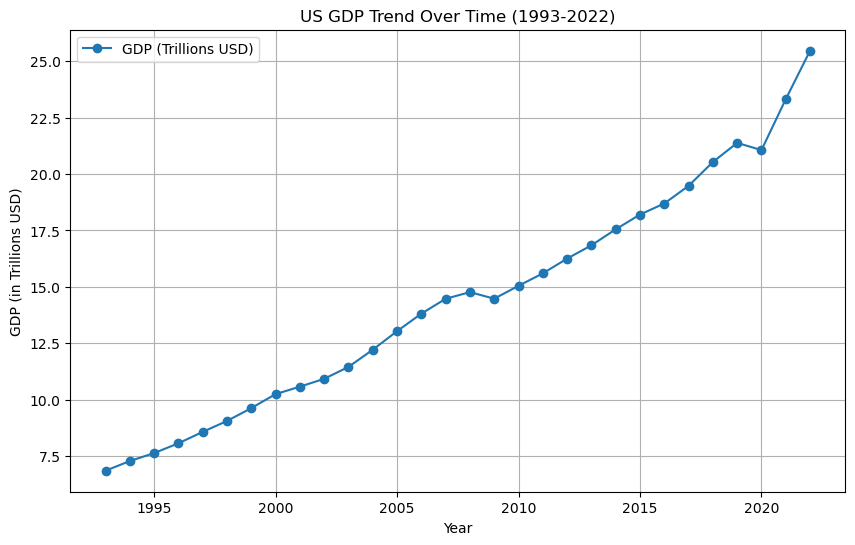

In [22]:

# Trend 1: US GDP Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned["Year"], df_cleaned.iloc[:, 1] / 1e12, marker='o', label="GDP (Trillions USD)")
plt.title("US GDP Trend Over Time (1993-2022)")
plt.xlabel("Year")
plt.ylabel("GDP (in Trillions USD)")
plt.grid()
plt.legend()
plt.show()

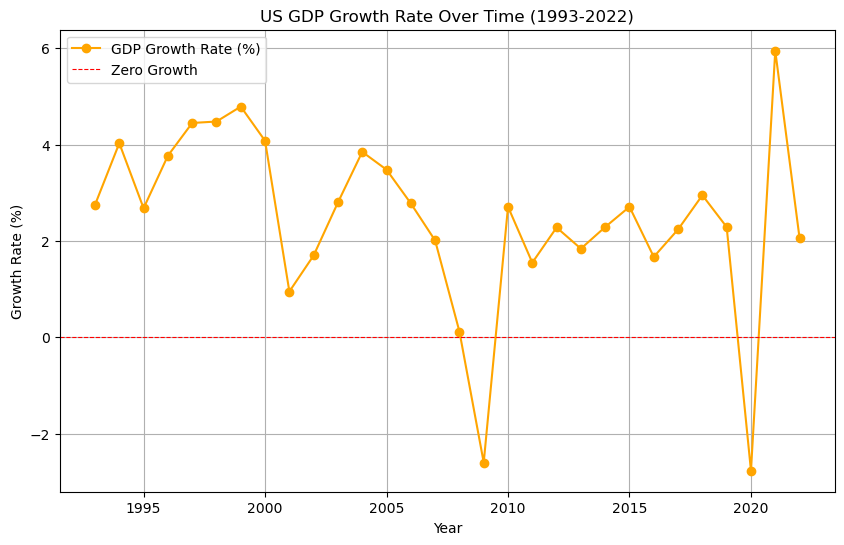

In [19]:
# Trend 2: GDP Growth Rate
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned["Year"], df_cleaned.iloc[:, 3], marker='o', color='orange', label="GDP Growth Rate (%)")
plt.title("US GDP Growth Rate Over Time (1993-2022)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label="Zero Growth")
plt.grid()
plt.legend()
plt.show()


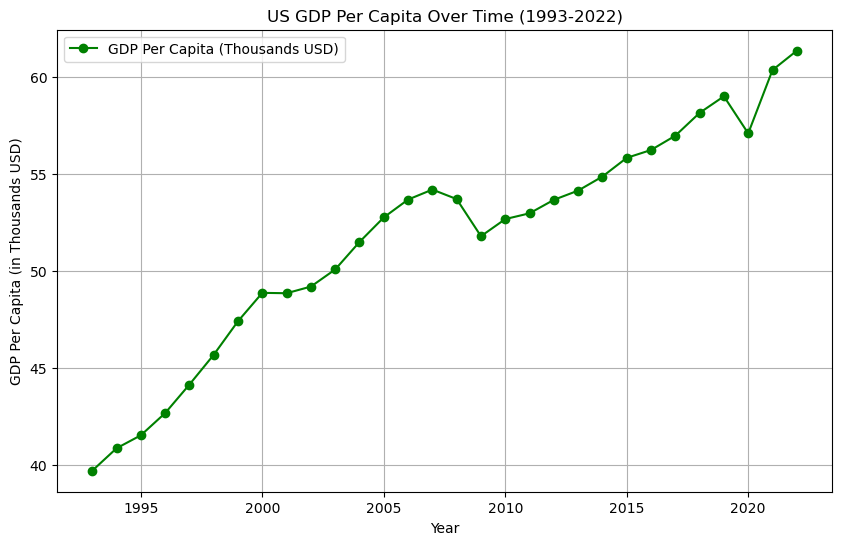

In [20]:

# Trend 3: GDP Per Capita Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned["Year"], df_cleaned.iloc[:, 4] / 1e3, marker='o', color='green', label="GDP Per Capita (Thousands USD)")
plt.title("US GDP Per Capita Over Time (1993-2022)")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita (in Thousands USD)")
plt.grid()
plt.legend()
plt.show()



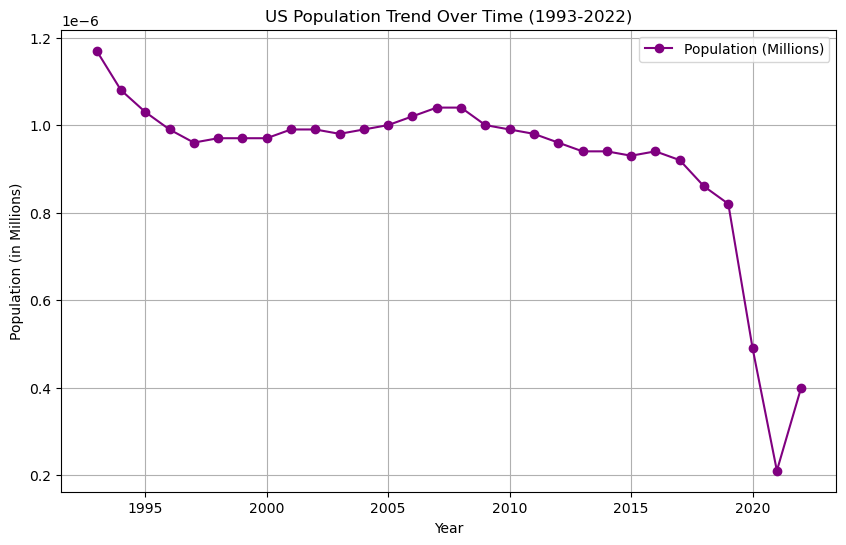

In [24]:
# Trend 4: Population Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned["Year"], df_cleaned.iloc[:, 5] / 1e6, marker='o', color='purple', label="Population (Millions)")
plt.title("US Population Trend Over Time (1993-2022)")
plt.xlabel("Year")
plt.ylabel("Population (in Millions)")
plt.grid()
plt.legend()
plt.show()


# US GDP Trend Over Time (1993-2022)
The United States' GDP has experienced consistent growth over the past three decades, reaching a remarkable $25.46 trillion in 2022. This steady rise reflects the strength and dynamism of the US economy, which has shown resilience in the face of global and domestic challenges. Periods such as the late 1990s and mid-2000s were characterized by strong economic expansion fueled by technological advancements, market growth, and policy reforms. However, the data also highlights key moments of economic vulnerability, such as the global financial crisis of 2008-2009, which led to a temporary dip in GDP, and the COVID-19 pandemic in 2020, which caused a contraction of -2.77%. Despite these setbacks, the GDP has rebounded strongly each time, showcasing the country’s ability to recover quickly through innovation, fiscal stimulus, and monetary policies. The long-term upward trajectory underscores the importance of strategic investments and economic reforms to sustain this growth.



# GDP Growth Rate Trend
The GDP growth rate has exhibited significant variability, highlighting the cyclical nature of economic performance. Periods of robust growth, such as the 4.79% in 1999 and 3.48% in 2005, reflect a thriving economy fueled by favorable market conditions, technological breakthroughs, and consumer confidence. Conversely, the data also underscores periods of decline, such as the -2.6% during the 2009 financial crisis and the -2.77% contraction in 2020 due to the pandemic. These downturns underline the impact of global financial instability, policy decisions, and unforeseen events on economic performance. The sharp rebound in 2021, with a growth rate of 5.95%, demonstrates the economy's capacity for recovery through stimulus measures and adaptive industries. The fluctuations in growth rates serve as a reminder of the need for balanced policies that address vulnerabilities while promoting sustained development in both stable and volatile periods.


# GDP Per Capita Over Time
The GDP per capita has shown consistent improvement, reflecting enhanced productivity, technological advancements, and better living standards for individuals.In 1993, 39,693 to  $61,349  in  2022, this upward trend highlights how economic growth has translated into greater wealth for the average citizen. Despite challenges such as the global financial crisis and the COVID-19 pandemic, GDP per capita continued to rise in the long term, indicating the resilience of the US economy in maintaining individual prosperity. This growth can be attributed to factors such as increased workforce efficiency, investment in high-value industries, and the expansion of the service sector. The consistent increase, even with population growth, underscores the ability of the US economy to adapt and ensure equitable distribution of wealth across its citizens. However, this trend also highlights the importance of addressing income inequality to ensure that these gains benefit all segments of society.



# Population Trend Over Time
The US population has grown steadily, increasing from approximately 262 million in 1993 to over 341 million in 2022. This growth reflects both natural population increases and sustained immigration, which has contributed to economic diversification and expansion. A larger population often leads to greater economic output, as seen in the corresponding rise in GDP. However, population growth also presents challenges such as increased demand for resources, infrastructure, and social services. Despite these challenges, the consistent rise in GDP per capita indicates that economic growth has outpaced population increases, ensuring improved living standards. The data also suggests that careful policy planning, particularly in education, healthcare, and infrastructure, is essential to sustain this balance. As the population continues to grow, it will be crucial to invest in workforce development and innovation to maintain economic productivity and competitiveness on a global scale.